In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_22.jpg', 'with_mask_1845.jpg', 'with_mask_2802.jpg', 'with_mask_3701.jpg', 'with_mask_3608.jpg']
['with_mask_2840.jpg', 'with_mask_1916.jpg', 'with_mask_3573.jpg', 'with_mask_1143.jpg', 'with_mask_1295.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1217.jpg', 'without_mask_1256.jpg', 'without_mask_3526.jpg', 'without_mask_3365.jpg', 'without_mask_2720.jpg']
['without_mask_3120.jpg', 'without_mask_1292.jpg', 'without_mask_1309.jpg', 'without_mask_2474.jpg', 'without_mask_2285.jpg']


In [9]:
print("Number of with mask images: ", len(with_mask_files))
print("Number of without mask images: ", len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [10]:
# Create the labels

with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying Images**

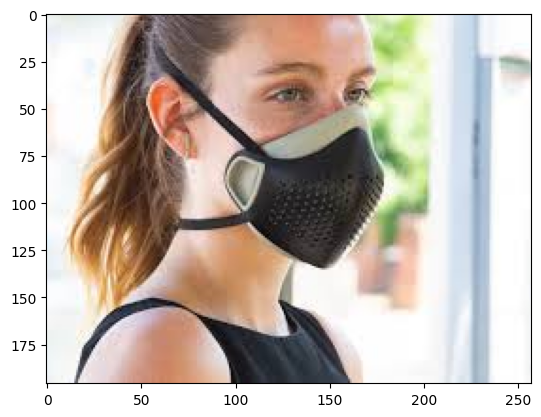

In [14]:
# Displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_3120.jpg')
imgplot = plt.imshow(img)
plt.show()

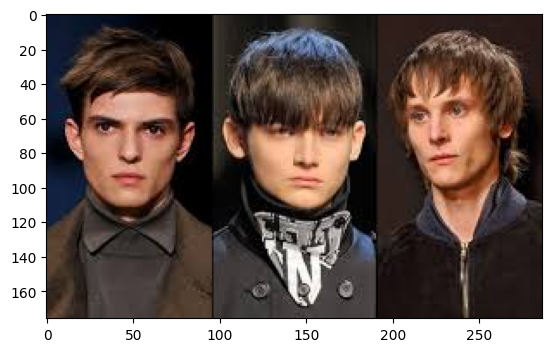

In [15]:
# Displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2840.jpg')
imgplot = plt.imshow(img)
plt.show()

# **Image Processing**

1. Resize the images

2. Convert the images to numpy arrays

In [16]:
# Converting images to numpy arrays

with_mask_path = '/content/data/with_mask/'
data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
print(len(data))
print(type(data))
print(type(data[0]))
print(data[0].shape)

7553
<class 'list'>
<class 'numpy.ndarray'>
(128, 128, 3)


In [18]:
# Converting image list and label list to numpy arrays

X = np.array(data)
y = np.array(labels)

In [19]:
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7553, 128, 128, 3)
(7553,)


Train Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


Scaling the Data

In [22]:
# Scaling with respect to pixel size from 0-255

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [23]:
X_train_scaled[1]

array([[[0.8745098 , 0.8745098 , 0.8745098 ],
        [0.8745098 , 0.8745098 , 0.8745098 ],
        [0.8745098 , 0.8745098 , 0.8745098 ],
        ...,
        [0.18823529, 0.14509804, 0.12156863],
        [0.18431373, 0.14117647, 0.1254902 ],
        [0.19607843, 0.15294118, 0.1372549 ]],

       [[0.8745098 , 0.8745098 , 0.8745098 ],
        [0.8745098 , 0.8745098 , 0.8745098 ],
        [0.8745098 , 0.8745098 , 0.8745098 ],
        ...,
        [0.19215686, 0.15294118, 0.12941176],
        [0.18431373, 0.14117647, 0.12941176],
        [0.19607843, 0.15294118, 0.14117647]],

       [[0.8745098 , 0.8745098 , 0.8745098 ],
        [0.8745098 , 0.8745098 , 0.8745098 ],
        [0.8745098 , 0.8745098 , 0.8745098 ],
        ...,
        [0.19607843, 0.16078431, 0.14509804],
        [0.19215686, 0.14901961, 0.14117647],
        [0.19607843, 0.15294118, 0.14509804]],

       ...,

       [[0.29803922, 0.21960784, 0.22352941],
        [0.32156863, 0.24705882, 0.25098039],
        [0.3254902 , 0

# **Building the CNN**

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size = 2))

model.add(keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = 2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [26]:
# Compiling CNN

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [31]:
# Training CNN

history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 3s 20ms/step - loss: 0.0694 - accuracy: 0.9731 - val_loss: 0.4808 - val_accuracy: 0.9289
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.0726 - accuracy: 0.9744 - val_loss: 0.4182 - val_accuracy: 0.9223
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.0697 - accuracy: 0.9737 - val_loss: 0.3663 - val_accuracy: 0.9124
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.0661 - accuracy: 0.9761 - val_loss: 0.4528 - val_accuracy: 0.9289
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.0698 - accuracy: 0.9761 - val_loss: 0.3771 - val_accuracy: 0.9240


# **Model Evaluation**

In [32]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy = ", accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2839 - accuracy: 0.9305
Test Accuracy =  0.9305095672607422


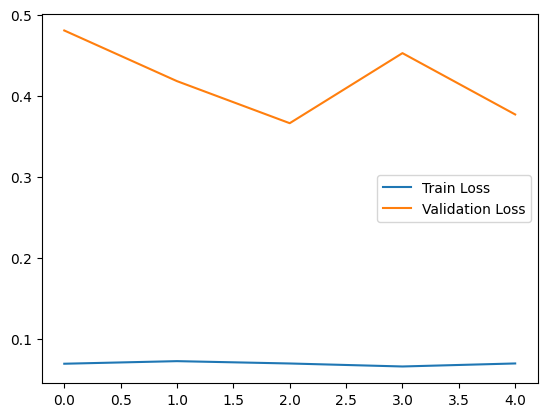

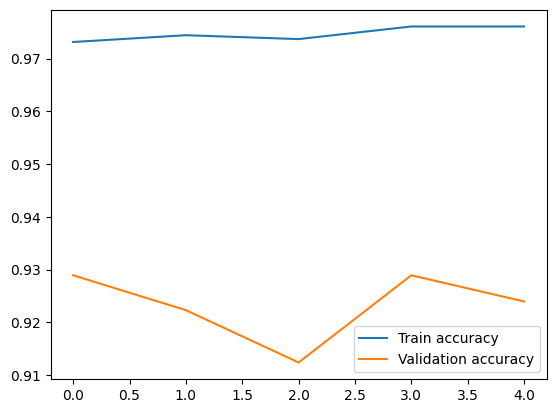

In [33]:
h = history

# Plot the loss value
plt.plot(h.history['loss'], label = 'Train Loss')
plt.plot(h.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.plot(h.history['accuracy'], label = 'Train accuracy')
plt.plot(h.history['val_accuracy'], label = 'Validation accuracy')
plt.legend()
plt.show()

# Prediction System

In [ ]:
input_image_path = input("Path of the image to be predicted: ")

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_prediction_label = np.argmax(input_prediction)
print(input_prediction_label)

if input_prediction_label == 1:
  print("the person in the image is wearing a mask")
else:
  print("the person in the image is not wearing a mask")